In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

ModuleNotFoundError: No module named 'tensorflow'

In [6]:
train_ds = keras.utils.image_dataset_from_directory(directory = 'C:/Users/divya/Desktop/Machine_Learning_Sebestian/Potato_Chip_CNN/Pepsico/Train',
                                       labels = "inferred",
                                       label_mode = "int",
                                       batch_size = 32,
                                        image_size = (256,256)
                                       )

validation_ds = keras.utils.image_dataset_from_directory(directory = 'C:/Users/divya/Desktop/Machine_Learning_Sebestian/Potato_Chip_CNN/Pepsico/Test',
                                       labels = "inferred",
                                       label_mode = "int",
                                       batch_size = 32,
                                        image_size = (256,256)
                                       )

Found 769 files belonging to 2 classes.
Found 192 files belonging to 2 classes.


In [8]:
# Normalize
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
## To create CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid',activation = 'relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"))

model.add(Conv2D(64,kernel_size = (3,3),padding = "valid",activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"))

model.add(Conv2D(128,kernel_size = (3,3),padding = "valid",activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid"))

model.add(Flatten())

model.add(Dense(128,activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

C:\Users\divya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer='adam',                  # Optimizer (e.g., Adam optimizer)
    loss='binary_crossentropy',        # Loss function (e.g., Binary Crossentropy for binary classification)
    metrics=['accuracy']               # Evaluation metric (e.g., Accuracy)
)

In [16]:
history = model.fit(train_ds,epochs=12,validation_data = validation_ds)

Epoch 1/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5169 - loss: 0.9093 - val_accuracy: 0.8073 - val_loss: 0.5843
Epoch 2/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 901ms/step - accuracy: 0.7451 - loss: 0.4040 - val_accuracy: 0.9948 - val_loss: 0.1391
Epoch 3/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 892ms/step - accuracy: 0.9785 - loss: 0.0806 - val_accuracy: 1.0000 - val_loss: 0.0381
Epoch 4/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 883ms/step - accuracy: 0.9880 - loss: 0.0479 - val_accuracy: 0.9844 - val_loss: 0.0684
Epoch 5/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 900ms/step - accuracy: 0.9964 - loss: 0.0149 - val_accuracy: 0.9792 - val_loss: 0.0560
Epoch 6/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 899ms/step - accuracy: 0.9938 - loss: 0.0372 - val_accuracy: 0.9635 - val_loss: 0.1468
Epoch 7/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 893ms/step - accuracy: 0.9722 - loss: 0.1356 - val_accuracy: 0.9948 - val_loss: 0.0294
Epoch 8/12
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 896ms/step - accuracy: 0.9942 - loss: 0.0575 - val_accurac

In [26]:
import matplotlib.pyplot as plt

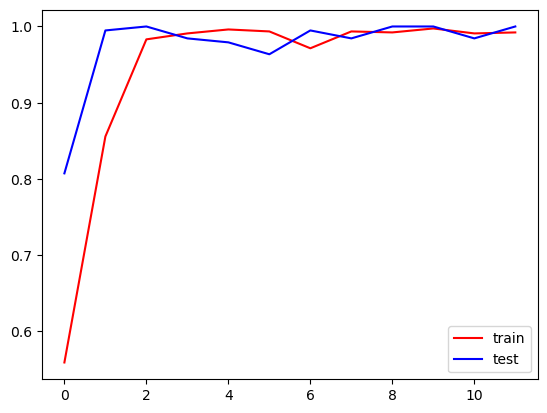

In [28]:
plt.plot(history.history["accuracy"],color = "red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label = "test")
plt.legend()
plt.show()

In [30]:
model.save('model.keras')

In [31]:
model.save('model.h5')  # or 'model_name.h5'